In [6]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
import os

In [7]:
os.chdir("/home/ess545/comp-lab-class/comp-lab-class/Week7/")

In [8]:
# from VMD we know RMSD = 1.5975

In [9]:
# load .pdb file
crystal = md.load("Inputs/2w9t.pdb")
colab = md.load("Inputs/DHFR2W9T_596c5_unrelaxed_rank_1_model_5.pdb")
alphafold_0 = md.load("Inputs/rcsb_pdb_2W9T/ranked_0.pdb")
alphafold_1 = md.load("Inputs/rcsb_pdb_2W9T/ranked_1.pdb")
alphafold_2 = md.load("Inputs/rcsb_pdb_2W9T/ranked_2.pdb")
alphafold_3 = md.load("Inputs/rcsb_pdb_2W9T/ranked_3.pdb")
alphafold_4 = md.load("Inputs/rcsb_pdb_2W9T/ranked_4.pdb")

In [10]:
# align two structures based on alpha carbons
af0_align = alphafold_0.superpose(crystal, 0, atom_indices=crystal.top.select('name CA'))
af1_align = alphafold_1.superpose(crystal, 0, atom_indices=crystal.top.select('name CA'))
af2_align = alphafold_2.superpose(crystal, 0, atom_indices=crystal.top.select('name CA'))
af3_align = alphafold_3.superpose(crystal, 0, atom_indices=crystal.top.select('name CA'))
af4_align = alphafold_4.superpose(crystal, 0, atom_indices=crystal.top.select('name CA'))


In [11]:
# compute RMSD for alpha carbons 
rmsd_a0_CA = md.rmsd(crystal, alphafold_0, 0, atom_indices = crystal.top.select('name CA'))
rmsd_a1_CA = md.rmsd(crystal, alphafold_1, 0, atom_indices = crystal.top.select('name CA'))
rmsd_a2_CA = md.rmsd(crystal, alphafold_2, 0, atom_indices = crystal.top.select('name CA'))
rmsd_a3_CA = md.rmsd(crystal, alphafold_3, 0, atom_indices = crystal.top.select('name CA'))
rmsd_a4_CA = md.rmsd(crystal, alphafold_4, 0, atom_indices = crystal.top.select('name CA'))

print(rmsd_a0_CA)
print(rmsd_a1_CA)
print(rmsd_a2_CA)
print(rmsd_a3_CA)
print(rmsd_a4_CA)

[2.1794763]
[2.1836731]
[2.181992]
[2.1798484]
[2.182787]


In [12]:
# compute RMSD for backbone
rmsd_a0_backbone = md.rmsd(crystal, alphafold_0, 0, atom_indices = crystal.top.select('backbone'))
rmsd_a1_backbone = md.rmsd(crystal, alphafold_1, 0, atom_indices = crystal.top.select('backbone'))
rmsd_a2_backbone = md.rmsd(crystal, alphafold_2, 0, atom_indices = crystal.top.select('backbone'))
rmsd_a3_backbone = md.rmsd(crystal, alphafold_3, 0, atom_indices = crystal.top.select('backbone'))
rmsd_a4_backbone = md.rmsd(crystal, alphafold_4, 0, atom_indices = crystal.top.select('backbone'))

print(rmsd_a0_backbone)
print(rmsd_a1_backbone)
print(rmsd_a2_backbone)
print(rmsd_a3_backbone)
print(rmsd_a4_backbone)

[2.1743612]
[2.1777475]
[2.176707]
[2.1743047]
[2.1778584]


In [13]:
# compute rmsd for side chain
rmsd_a0_side = md.rmsd(crystal, alphafold_0, 0, atom_indices = crystal.top.select('sidechain'))
rmsd_a1_side = md.rmsd(crystal, alphafold_1, 0, atom_indices = crystal.top.select('sidechain'))
rmsd_a2_side = md.rmsd(crystal, alphafold_2, 0, atom_indices = crystal.top.select('sidechain'))
rmsd_a3_side = md.rmsd(crystal, alphafold_3, 0, atom_indices = crystal.top.select('sidechain'))
rmsd_a4_side = md.rmsd(crystal, alphafold_4, 0, atom_indices = crystal.top.select('sidechain'))

print(rmsd_a0_side)
print(rmsd_a1_side)
print(rmsd_a2_side)
print(rmsd_a3_side)
print(rmsd_a4_side)

[2.2040715]
[2.205441]
[2.2038753]
[2.2019432]
[2.2042208]


NameError: name 'all_alpha_carbons' is not defined

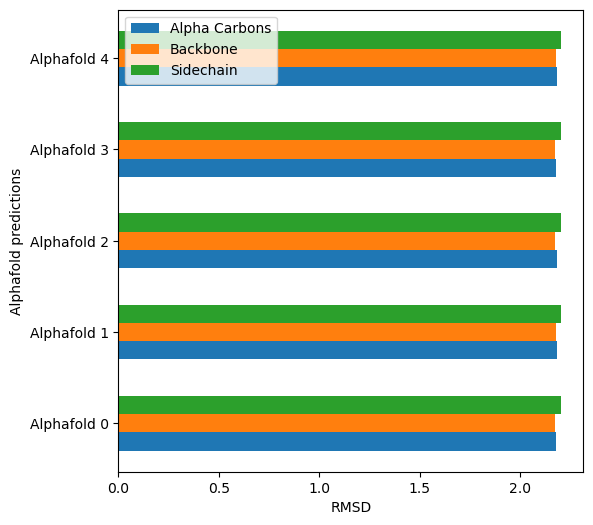

In [16]:
# bar plot of RMSD calculations
# create a figure
fig, ax = plt.subplots(1, 1, figsize=(6,6))
groups = ['Alphafold 0', 'Alphafold 1', 'Alphafold 2', 'Alphafold 3', 'Alphafold 4']
alpha = [rmsd_a0_CA[0], rmsd_a1_CA[0], rmsd_a2_CA[0], rmsd_a3_CA[0], rmsd_a4_CA[0]]
backbone = [rmsd_a0_backbone[0], rmsd_a1_backbone[0], rmsd_a2_backbone[0], rmsd_a3_backbone[0], rmsd_a4_backbone[0]]
sidechain = [rmsd_a0_side[0], rmsd_a1_side[0], rmsd_a2_side[0], rmsd_a3_side[0], rmsd_a4_side[0]]
X_axis = np.arange(len(groups))
plt.barh(X_axis - 0.2, alpha, 0.2, label = 'Alpha Carbons')
plt.barh(X_axis, backbone, 0.2, label = 'Backbone')
plt.barh(X_axis + 0.2, sidechain, 0.2, label = 'Sidechain')
plt.yticks(X_axis, groups)
plt.xlabel("RMSD")
plt.ylabel('Alphafold predictions')
plt.legend(loc = 'upper left')
for i, value in enumerate(all_alpha_carbons):
    ax.text(value + 0.4, i + 0.2, str(round(value, 3)))
for j, value in enumerate(all_backbone):
    ax.text(value + 0.4, j, str(round(value, 3)))
for k, value in enumerate(all_sidechain):
    ax.text(value + 0.36, k - 0.17, str(round(value, 3)))
# save the figure
plt.savefig('rmsd_bar_plot.png', dpi=500, bbox_inches='tight')